In [1]:
import numpy as np
import pandas as pd

Importing Genome Tags 

In [2]:
genomes = pd.read_csv("new_genome.csv")

In [3]:
genomes.head()

,movieId,tagId,relevance,tagId.1,tag
0,1,1,0.02875,1,7
1,1,2,0.02375,2,007 (series)
2,1,3,0.06250,3,18th century
3,1,4,0.07575,4,1920s
4,1,5,0.14075,5,1930s


In [5]:
genomes.sort_values(by = 'movieId')

,movieId,tagId,relevance,tagId.1,tag
0,1,1,0.02875,1,7
742,1,743,0.76550,743,original plot
743,1,744,0.04100,744,orphans
744,1,745,0.60800,745,oscar
745,1,746,0.10925,746,oscar (best actor)
...,...,...,...,...,...
15583693,206499,374,0.24125,374,family
15583692,206499,373,0.23575,373,fake documentary
15583691,206499,372,0.04875,372,fairy tales
15583697,206499,378,0.26150,378,fantasy world


In [16]:
genomes.columns

Index(['movieId', 'tagId', 'relevance', 'tagId.1', 'tag'], dtype='object')

In [6]:
x = [a for a in genomes.movieId]

In [45]:
x

[69122,
 48516,
 68358,
 48774,
 91529,
 48394,
 55820,
 48780,
 70286,
 54286,
 89745,
 79132,
 106782,
 44191,
 60069,
 72998,
 99114,
 109487,
 56367,
 59315,
 50872,
 68157,
 116797,
 58559,
 51662,
 112852,
 68954,
 74458,
 63082,
 134130,
 46578,
 49272]

In [9]:
len(set(x))

13816

In [17]:
b = genomes.groupby('movieId').tagId.nlargest(10).reset_index()

In [18]:
b

,movieId,level_1,tagId
0,1,1127,1128
1,1,1126,1127
2,1,1125,1126
3,1,1124,1125
4,1,1123,1124
...,...,...,...
138155,206499,15584442,1123
138156,206499,15584441,1122
138157,206499,15584440,1121
138158,206499,15584439,1120


In [47]:
w = genomes.sort_values(['movieId', 'relevance', 'tag'], ascending=False).groupby('movieId').head(8)

In [48]:
w

,movieId,tagId,relevance,tagId.1,tag
15584061,206499,742,0.88600,742,original
15584096,206499,777,0.80825,777,pg-13
15583922,206499,603,0.76725,603,light
15584174,206499,855,0.75850,855,road trip
15584120,206499,801,0.74475,801,pornography
...,...,...,...,...,...
588,1,589,0.98575,589,kids and family
63,1,64,0.98425,64,animation
587,1,588,0.98000,588,kids
784,1,785,0.96450,785,pixar


In [49]:
out = w[['movieId', 'tag', 'relevance']]

In [50]:
out

,movieId,tag,relevance
15584061,206499,original,0.88600
15584096,206499,pg-13,0.80825
15583922,206499,light,0.76725
15584174,206499,road trip,0.75850
15584120,206499,pornography,0.74475
...,...,...,...
588,1,kids and family,0.98575
63,1,animation,0.98425
587,1,kids,0.98000
784,1,pixar,0.96450


In [51]:
out.to_csv('genome_out.csv', index =False)

## Genome plus All_stats

In [52]:
all_stats = pd.read_csv("allstats_full.csv")
all_stats.head()

,title,ratings_mean,ratings_min,ratings_max,ratings_count,movieId,title.1,genres
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",3.000000,3.0,3.0,1,208297,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",Documentary|Drama
1,"""Great Performances"" Cats (1998)",2.896648,0.5,5.0,179,51372,"""Great Performances"" Cats (1998)",Musical
2,#1 Cheerleader Camp (2010),2.111111,0.5,4.0,9,136604,#1 Cheerleader Camp (2010),Comedy|Drama
3,#Captured (2017),3.750000,2.5,5.0,2,183901,#Captured (2017),Horror
4,#Female Pleasure (2018),3.666667,3.5,4.0,3,195955,#Female Pleasure (2018),Documentary


In [55]:
len(all_stats)

62423

In [66]:
stats_imp = all_stats[all_stats['ratings_count'] > 1000]

We are only considering the movies where the number of ratings for the movie are more than 1000. This takes away most of the outlier bias which was getting dreated because of some movies having very less number of ratings but those ratings were quite high 

In [67]:
stats_imp

,title,ratings_mean,ratings_min,ratings_max,ratings_count,movieId,title.1,genres
40,"'burbs, The (1989)",3.114910,0.5,5.0,3320,2072,"'burbs, The (1989)",Comedy
42,(500) Days of Summer (2009),3.725344,0.5,5.0,11498,69757,(500) Days of Summer (2009),Comedy|Drama|Romance
49,*batteries not included (1987),3.244816,0.5,5.0,1736,8169,*batteries not included (1987),Children|Comedy|Fantasy|Sci-Fi
53,...And Justice for All (1979),3.639286,0.5,5.0,1120,3420,...And Justice for All (1979),Drama|Thriller
95,10 Cloverfield Lane (2016),3.714617,0.5,5.0,3660,152077,10 Cloverfield Lane (2016),Thriller
...,...,...,...,...,...,...,...,...
62204,[REC] (2007),3.703164,0.5,5.0,1991,57274,[REC] (2007),Drama|Horror|Thriller
62220,eXistenZ (1999),3.349642,0.5,5.0,5580,2600,eXistenZ (1999),Action|Sci-Fi|Thriller
62243,xXx (2002),2.786182,0.5,5.0,5956,5507,xXx (2002),Action|Crime|Thriller
62245,xXx: State of the Union (2005),2.337158,0.5,5.0,1133,33158,xXx: State of the Union (2005),Action|Crime|Thriller


In [68]:
stats_imp.columns

Index(['title', 'ratings_mean', 'ratings_min', 'ratings_max', 'ratings_count',
       'movieId', 'title.1', 'genres'],
      dtype='object')

In [69]:
stats_imp = stats_imp[['movieId', 'title', 'ratings_mean','ratings_count', 'genres']]
stats_imp

,movieId,title,ratings_mean,ratings_count,genres
40,2072,"'burbs, The (1989)",3.114910,3320,Comedy
42,69757,(500) Days of Summer (2009),3.725344,11498,Comedy|Drama|Romance
49,8169,*batteries not included (1987),3.244816,1736,Children|Comedy|Fantasy|Sci-Fi
53,3420,...And Justice for All (1979),3.639286,1120,Drama|Thriller
95,152077,10 Cloverfield Lane (2016),3.714617,3660,Thriller
...,...,...,...,...,...
62204,57274,[REC] (2007),3.703164,1991,Drama|Horror|Thriller
62220,2600,eXistenZ (1999),3.349642,5580,Action|Sci-Fi|Thriller
62243,5507,xXx (2002),2.786182,5956,Action|Crime|Thriller
62245,33158,xXx: State of the Union (2005),2.337158,1133,Action|Crime|Thriller


In [81]:
stats_imp.to_csv("stats_imp.csv", index=False)

In [84]:
movie_ids = pd.DataFrame(stats_imp['movieId'])
movie_ids

,movieId
40,2072
42,69757
49,8169
53,3420
95,152077
...,...
62204,57274
62220,2600
62243,5507
62245,33158


The movieIds which are really important to our analysis

These movies is joined with genome_stats.csv in XSV and additional wrangling and data cleaning is done in Trifacta 

In [85]:
movie_ids.to_csv("movie_ids.csv", index=False)

In [74]:
genome = pd.read_csv("genome_movies.csv")
genome.head()

,movieId,tag,relevance,movieId.1,title,genres
0,206499,original,0.88600,206499,Between Two Ferns: The Movie (2019),Comedy
1,206499,pg-13,0.80825,206499,Between Two Ferns: The Movie (2019),Comedy
2,206499,light,0.76725,206499,Between Two Ferns: The Movie (2019),Comedy
3,206499,road trip,0.75850,206499,Between Two Ferns: The Movie (2019),Comedy
4,206499,pornography,0.74475,206499,Between Two Ferns: The Movie (2019),Comedy


In [75]:
len(genome)

110528

In [78]:
len(set(genome.movieId))

13816

In [79]:
len(genome) == len(set(genome.movieId)) *8

True

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("mov_rating_date1.csv")
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,2006-05-17 11:34:04,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,2006-05-17 08:26:57,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,2006-05-17 08:27:08,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,2006-05-17 11:13:40,Underground (1995),Comedy|Drama|War
4,1,899,3.5,2006-05-17 08:21:50,Singin' in the Rain (1952),Comedy|Musical|Romance


In [5]:
a = pd.read_csv("movie_ids.csv")
a.head()

,movieId
0,2072
1,69757
2,8169
3,3420
4,152077


In [19]:
b = [_ for _ in a.movieId]

In [20]:
b

[2072,
 69757,
 8169,
 3420,
 152077,
 2572,
 58293,
 1367,
 2085,
 3991,
 1203,
 105844,
 81562,
 7444,
 2826,
 53953,
 4167,
 43936,
 68135,
 2117,
 999,
 6383,
 103883,
 1019,
 2504,
 924,
 2311,
 72378,
 27266,
 58803,
 6953,
 93510,
 112138,
 5508,
 5954,
 56949,
 3534,
 6502,
 53000,
 73881,
 30803,
 55282,
 51662,
 4159,
 109673,
 965,
 54997,
 5151,
 35836,
 2731,
 3077,
 5049,
 7293,
 89864,
 2188,
 3986,
 3153,
 1251,
 1503,
 5810,
 2505,
 71057,
 204982,
 3707,
 111743,
 185029,
 192385,
 78469,
 4370,
 8810,
 56801,
 2262,
 5945,
 104374,
 5377,
 95207,
 2015,
 1459,
 1127,
 47518,
 4464,
 4465,
 344,
 19,
 54190,
 7121,
 5902,
 410,
 2124,
 1541,
 84954,
 67734,
 2133,
 4467,
 3070,
 2846,
 828,
 345,
 940,
 3754,
 90746,
 37386,
 932,
 2439,
 969,
 102880,
 7419,
 412,
 6624,
 3251,
 7063,
 3841,
 1592,
 1608,
 413,
 2792,
 2791,
 2520,
 1274,
 588,
 114240,
 8977,
 8948,
 5009,
 1032,
 74789,
 1214,
 3701,
 169984,
 1690,
 1200,
 1320,
 3250,
 926,
 3083,
 2123,
 631,
 1

In [15]:
c

,userId,movieId,rating,timestamp,title,genres
2439,12,69757,3.0,2010-12-03 09:10:50,(500) Days of Summer (2009),Comedy|Drama|Romance
2885,14,69757,4.0,2017-09-23 19:25:04,(500) Days of Summer (2009),Comedy|Drama|Romance
4524,29,69757,3.5,2012-06-18 20:55:32,(500) Days of Summer (2009),Comedy|Drama|Romance
10316,75,69757,3.5,2018-09-18 03:57:58,(500) Days of Summer (2009),Comedy|Drama|Romance
11679,84,69757,3.5,2016-12-15 14:15:19,(500) Days of Summer (2009),Comedy|Drama|Romance
...,...,...,...,...,...,...
24976494,162424,69757,4.0,2018-07-16 13:17:42,(500) Days of Summer (2009),Comedy|Drama|Romance
24977463,162432,69757,3.5,2010-04-26 21:25:47,(500) Days of Summer (2009),Comedy|Drama|Romance
24990778,162508,69757,2.5,2013-04-05 16:39:37,(500) Days of Summer (2009),Comedy|Drama|Romance
24995796,162516,69757,4.0,2010-01-15 10:39:16,(500) Days of Summer (2009),Comedy|Drama|Romance


In [25]:
new_df = df.loc[df['movieId'].isin(b)]

In [27]:
len(new_df)

22138587

In [26]:
len(set(new_df.movieId))

3799

# Addtional Statistics 

In [2]:
import numpy as np
import pandas as pd

In [3]:
x = pd.read_csv("stats_imp.csv")

In [4]:
x

,movieId,title,ratings_mean,ratings_count,genres
0,2072,"'burbs, The (1989)",3.114910,3320,Comedy
1,69757,(500) Days of Summer (2009),3.725344,11498,Comedy|Drama|Romance
2,8169,*batteries not included (1987),3.244816,1736,Children|Comedy|Fantasy|Sci-Fi
3,3420,...And Justice for All (1979),3.639286,1120,Drama|Thriller
4,152077,10 Cloverfield Lane (2016),3.714617,3660,Thriller
...,...,...,...,...,...
3794,57274,[REC] (2007),3.703164,1991,Drama|Horror|Thriller
3795,2600,eXistenZ (1999),3.349642,5580,Action|Sci-Fi|Thriller
3796,5507,xXx (2002),2.786182,5956,Action|Crime|Thriller
3797,33158,xXx: State of the Union (2005),2.337158,1133,Action|Crime|Thriller


In [5]:
y = pd.read_csv("genome_stats1.csv")
y

,movieId,tag,relevance,title,genres,ratings_mean,ratings_count
0,201773,technology,0.93500,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
1,201773,action,0.90800,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
2,201773,pg-13,0.89450,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
3,201773,visually appealing,0.88525,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
4,201773,superheroes,0.87250,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
...,...,...,...,...,...,...,...
30419,1,kids and family,0.98575,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30420,1,animation,0.98425,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30421,1,kids,0.98000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30422,1,pixar,0.96450,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309


In [6]:
y.dropna()

,movieId,tag,relevance,title,genres,ratings_mean,ratings_count
0,201773,technology,0.93500,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
1,201773,action,0.90800,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
2,201773,pg-13,0.89450,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
3,201773,visually appealing,0.88525,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
4,201773,superheroes,0.87250,Spider-Man: Far from Home (2019),Action|Adventure|Sci-Fi,3.712522,1134
...,...,...,...,...,...,...,...
30419,1,kids and family,0.98575,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30420,1,animation,0.98425,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30421,1,kids,0.98000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30422,1,pixar,0.96450,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309


# Oscar Movies

In [7]:
a = y[y.tag.str.contains("oscar")]
a

,movieId,tag,relevance,title,genres,ratings_mean,ratings_count
44,192385,oscar,0.73700,A Star Is Born (2018),Drama|Romance,3.605566,1042
119,183897,oscar,0.70050,Isle of Dogs (2018),Animation|Comedy,3.857245,2098
128,183837,oscar,0.85600,The Favourite,Drama,3.829861,1296
176,178061,oscar,0.94500,"""I, Tonya (2017)""",Drama,3.718695,1134
180,178061,oscar (best directing),0.77600,"""I, Tonya (2017)""",Drama,3.718695,1134
...,...,...,...,...,...,...,...
30061,52,oscar (best actress),0.68325,Mighty Aphrodite (1995),Comedy|Drama|Romance,3.532892,8543
30064,50,oscar (best supporting actor),0.99875,"""Usual Suspects, The (1995)""",Crime|Mystery|Thriller,4.284353,55366
30135,41,oscar (best supporting actress),0.82775,Richard III (1995),Drama|War,3.843413,4266
30146,36,oscar (best actress),0.95925,Dead Man Walking (1995),Crime|Drama,3.918687,19388


In [8]:
x = y[(y.ratings_count > 40000) | (y.ratings_mean>4) | (y.tag.str.contains("oscar"))]
x

,movieId,tag,relevance,title,genres,ratings_mean,ratings_count
8,195159,visually appealing,0.93625,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,4.111345,3085
9,195159,original,0.92600,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,4.111345,3085
10,195159,visually stunning,0.89550,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,4.111345,3085
11,195159,superheroes,0.82650,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,4.111345,3085
12,195159,storytelling,0.82250,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,4.111345,3085
...,...,...,...,...,...,...,...
30419,1,kids and family,0.98575,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30420,1,animation,0.98425,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30421,1,kids,0.98000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
30422,1,pixar,0.96450,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309


In [9]:
len(set(x.movieId))

628

In [10]:
x.ratings_count.max()

81491

In [11]:
import matplotlib.pyplot as plt

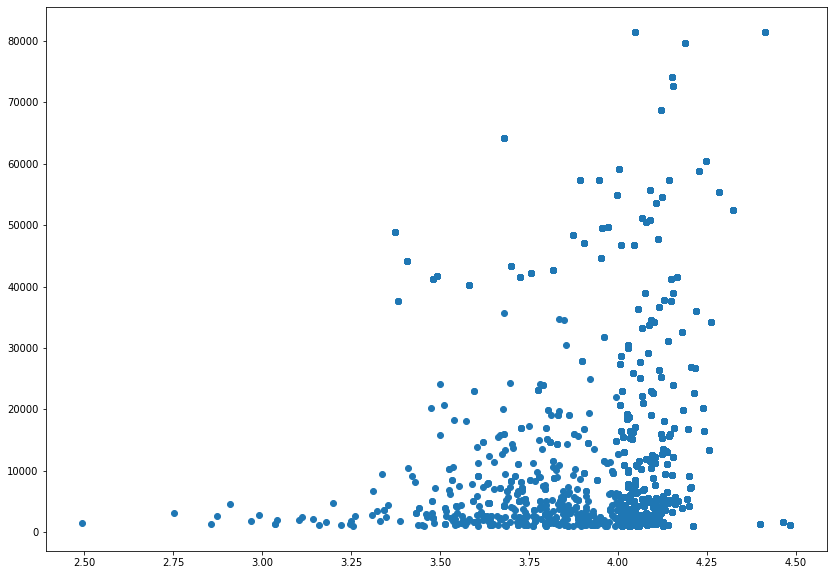

In [12]:
plt.figure(figsize=(14,10))
plt.scatter(x.ratings_mean, x.ratings_count)

In [25]:
new_id = new["movieId"]
new_id

1056    134130
1057    134130
1058    134130
1059    134130
1060    134130
         ...  
7579     44191
7580     44191
7581     44191
7582     44191
7583     44191
Name: movieId, Length: 256, dtype: int64

In [26]:
new_ids = pd.DataFrame(set(new_id), columns=['movieId'])

In [27]:
new_ids

,movieId
0,69122
1,48516
2,68358
3,48774
4,91529
5,48394
6,55820
7,48780
8,70286
9,54286


In [176]:
new_ids.to_csv("new_ids.csv", index=False)